# The Simulation Configuration

To run a simulation, a simulation configuration object must be created.
This object will contain all the information necessary to customize the simulation however you like in order to fit a specific scenario.
(For example, a scenario where social isolation is stopped too early which introduces a second wave of infections.)

Here is what the configuration object looks like for a basic simulation also known as the "If nothing is done scenario"
We will go over each individual input to understand what they mean

In [1]:
from src.config import Config
import src.prob_distribution as dist
from src.visualization import plot_distribution

ticks_per_day = 48
config = Config(ticks_per_day=ticks_per_day,
                number_of_communities=3,
                people_per_community=150,
                transmit_prob_distribution=dist.gaussian_prob_in_days_per_event(mean_days_per_event=8, std_days_per_event=1, ticks_per_day=ticks_per_day),
                travel_prob_distribution=dist.multi_dist(
                                                gaussian_list=[
                                                        dist.gaussian_prob_in_days_per_event(mean_days_per_event=40, std_days_per_event=5, ticks_per_day=ticks_per_day),
                                                        dist.gaussian_prob_in_days_per_event(mean_days_per_event=365, std_days_per_event=40, ticks_per_day=ticks_per_day)
                                                    ],
                                                weights=[0.8, 0.2]
                                        ),
                recovery_time_distribution=dist.gaussian_time_in_days(mean_days=14, std_days=2, ticks_per_day=ticks_per_day),
                incubation_time_distribution=dist.gaussian_time_in_days(mean_days=11, std_days=1.5, ticks_per_day=ticks_per_day),
                public_place_prob_distribution=dist.gaussian_prob_in_days_per_event(mean_days_per_event=4, std_days_per_event=1, ticks_per_day=ticks_per_day),
                public_place_time_distribution=dist.gaussian_time_in_ticks(mean=1, std=0.2)
        )

## Ticks per day

A Tick is the discrete measure of time used in these simulations. The higher this number, the more granularity we will have in our events.
However, the simulation time will increase.

In this case there are 48 ticks per day meaning one tick equals 30 minutes

## Number of communities

In this simulation, travel between communities is possible. This number represents the number of communities that will be part of the simulation

## People per community

This number represents the number of people starting in each community. In our case, we have 3 communities with 150 people each for a total of 450 people as part of the simulation

## Transmit Probability Distribution

The transmission probability the probability that when two people interact (By shaking hands, coughing close to each other, touching the same thing etc...) the probability that the infection is transmitted if one of them is sick and the other is healthy
This number essentially indicates how careful an individual is (wish washing its hands, coughing in elbow etc...)

Each individual is assigned a number for this transmission probability distributions. And when two people interact, we average their transmission probabilities to determine the probability of the infection transmitting between these two individuals.
- Two individuals that are both careful will have a very low probability
- An individual that is not careful and an other that is will have a transmission probability that is midway between them.

Since not everyone will have this same "carefulness" metric, we use a distribution.

The ````gaussian_prob_in_days_per_event```` function is able generate distributions. It takes the mean number of days per event.
In this case, we chose 8. This means that an individual is expected to infect another every 8 days while sick (with a standard deviation of 1 day)

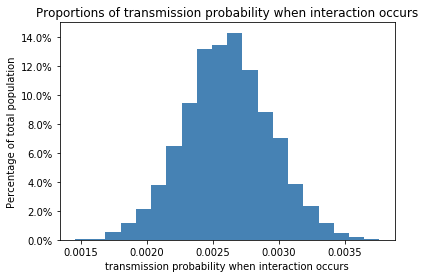

In [2]:
transmit_prob_distribution = dist.gaussian_prob_in_days_per_event(mean_days_per_event=8, std_days_per_event=1, ticks_per_day=ticks_per_day)

# Plotting what it looks like
plot_distribution(transmit_prob_distribution, 'transmission probability when interaction occurs')

We can see that the peak (mean) of the distribution is around p=0.0025%. At each tick, a person has a 0.0025% chance of infecting another person.

0.0025 infection/tick * 48 ticks/day * 8 day = 1 infection

It adds up.

## Incubation Time Distribution

The incubation time is different for each individual, which is why we use a distribution.

Since this time we are dealing with time, and not a probability, we use the ````gaussian_time_in_days```` method with a mean of 11 days incubation and a standard deviation of 1.5 days.

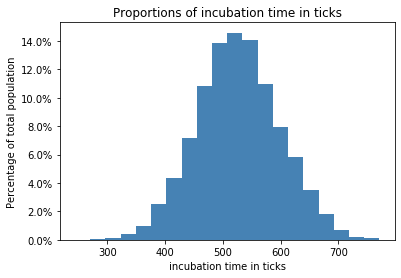

In [3]:
incubation_time_distribution = dist.gaussian_time_in_days(mean_days=11, std_days=1.5, ticks_per_day=ticks_per_day)

plot_distribution(incubation_time_distribution, 'incubation time in ticks')

We can see that the peak (mean) is around 525 ticks of incubation period.

525 ticks / (48 ticks/day) = 11 days

It adds up.

## Recovery Time Distribution

This distribution corresponds to the time is takes for people to recover after starting to show symptoms.

In out case we have a mean recovery time of 14 days with a standard deviation of 2 days

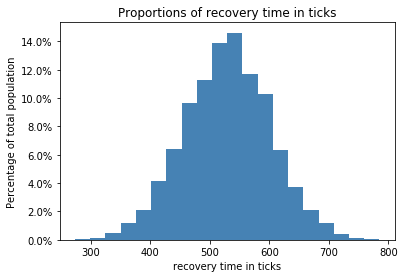

In [4]:
recovery_time_distribution = dist.gaussian_time_in_days(mean_days=11, std_days=1.5, ticks_per_day=ticks_per_day)

plot_distribution(recovery_time_distribution, 'recovery time in ticks')

## Travel Probability Distribution

The simulation allows people to travel between communities. This probability distribution dictates how often people travel between communities.

However, some people travel more than others, and some people dont travel at all! So we will now use the ````multi_dist```` function in order to combine many ````gaussian_prob_in_days_per_event```` distributions

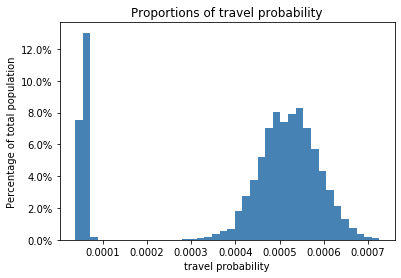

In [5]:
travel_prob_distribution = dist.multi_dist(
    gaussian_list=[dist.gaussian_prob_in_days_per_event(40, 5, ticks_per_day), dist.gaussian_prob_in_days_per_event(365, 40, ticks_per_day)],
    weights=[0.8, 0.2])

plot_distribution(travel_prob_distribution, 'travel probability', bins=40)


As we can see our distribution is split between most people traveling between communities on average every 40 days and the rest have a very low probability of ever travelling

## Public Place Probability Distribution

The model also allows people to visit public places (such as a supermarket) where the chances of interacting with people is higher. (By being in closer, physical proximity etc...)

In our model, we can see that on average, a person visits a public place such as a supermarket once every four days with a standard deviation of 1 day

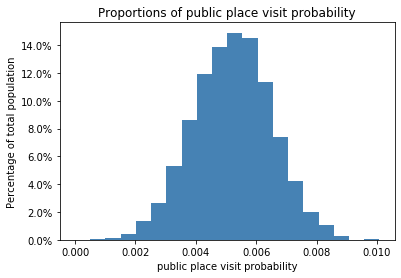

In [6]:
public_place_prob_distribution = dist.gaussian_prob_in_days_per_event(mean_days_per_event=4, std_days_per_event=1, ticks_per_day=ticks_per_day)

plot_distribution(public_place_prob_distribution, 'public place visit probability')

## Public Place Time Distribution

Finally, the last argument is the distribution for the time spent at the public space.

This time we use the ````gaussian_time_in_ticks```` function since runs to the grocery store are quite fast.

Here on average, individuals spend 1 tick (30 minutes) at the public place with a standard deviation of 0.2 ticks

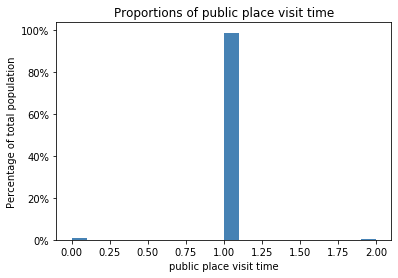

In [7]:
public_place_time_distribution = dist.gaussian_time_in_ticks(mean=1, std=0.2)

plot_distribution(public_place_time_distribution, 'public place visit time')

As we can see, most people spend 1 tick at the public place, and very few spend 0 tick or 2 tick.

This is one of the limitations of the model where the more ticks there are in a day, the more accurate we can make the model, but the longer the simulations take to run.

# Triggers

Triggers are objects used to trigger policy events.

The three existing policies are:
- Social distancing
- Travel restrictions
- Reduced trips to public places
- Testing and quarantining confirmed cases

When adding these optional arguments to the simulation configuration configuration to activate these policies we get something like this:

In [8]:
from src.triggers.reduction_trigger import ReductionEventTrigger
from src.triggers.testing_trigger import TestingTrigger

ticks_per_day = 48
config = Config(ticks_per_day=ticks_per_day,
                number_of_communities=3,
                people_per_community=150,
                transmit_prob_distribution=dist.gaussian_prob_in_days_per_event(mean_days_per_event=8, std_days_per_event=1, ticks_per_day=ticks_per_day),
                travel_prob_distribution=dist.multi_dist(
                                                gaussian_list=[
                                                        dist.gaussian_prob_in_days_per_event(mean_days_per_event=40, std_days_per_event=5, ticks_per_day=ticks_per_day),
                                                        dist.gaussian_prob_in_days_per_event(mean_days_per_event=365, std_days_per_event=40, ticks_per_day=ticks_per_day)
                                                    ],
                                                weights=[0.8, 0.2]
                                        ),
                recovery_time_distribution=dist.gaussian_time_in_days(mean_days=14, std_days=2, ticks_per_day=ticks_per_day),
                incubation_time_distribution=dist.gaussian_time_in_days(mean_days=11, std_days=1.5, ticks_per_day=ticks_per_day),
                public_place_prob_distribution=dist.gaussian_prob_in_days_per_event(mean_days_per_event=4, std_days_per_event=1, ticks_per_day=ticks_per_day),
                public_place_time_distribution=dist.gaussian_time_in_ticks(mean=1, std=0.2),
            
                social_distancing_trigger=ReductionEventTrigger(
                                                start_percentages=[0.1],
                                                end_percentages=[0.01],
                                                reduction_factor_distribution=dist.multi_dist(
                                                    gaussian_list=[
                                                        dist.gaussian(mean=5, std=0.5),
                                                        dist.constant(1)
                                                    ],
                                                    weights=[0.8, 0.2]
                                                )
                                        ),
                travel_restrictions_trigger=ReductionEventTrigger(
                                                start_percentages=[0.1],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(mean=20, std=2)
                                        ),
                reduced_public_place_trips_trigger=ReductionEventTrigger(
                                                start_percentages=[0.15],
                                                end_percentages=[0.05],
                                                reduction_factor_distribution=dist.gaussian(mean=4, std=0.5)
                                        ),
                testing_trigger=TestingTrigger(
                                                start_percentages=[0.02],
                                                end_percentages=[],
                                                time_to_test_distribution=dist.gaussian_time_in_days(mean_days=2, std_days=0.3, ticks_per_day=ticks_per_day),
                                                unsuccessful_test_prob_distribution=dist.gaussian(mean=0.1, std=0.01)
                                        )
            )

## Social Distancing

The social distancing trigger is used to enable social distancing rules.

The start percentage of the event trigger is a list of when to enable the policy. And the end percentage indicates when to stop the policy.
The percentages are the percentage of the total population showing symptoms in order to enable/disable the policy.

The reduction factor distribution is the factor by which people will reduce their interactions with others.
So each individual is assigned a number from this distribution which represents a factor by which they will reduce their interactions with others.

All pairs of people will average their reduction factor which will reduce the probability of them interacting. So if someone does not respect social distancing but another person does, then their interactions will still be decreased by a small amount.
Less than if both individuals were respecting social distancing but more than two individuals that are not practicing social distancing.

In our case, we have 20% of people that are on average reducing their interactions with others by a factor of 5 and 20% of the population that are not changing their habits.

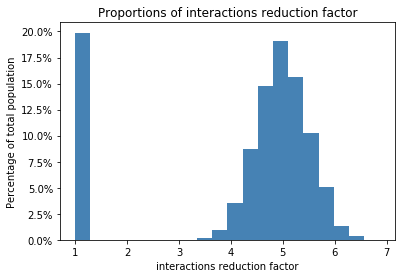

In [9]:
social_distancing_trigger = ReductionEventTrigger(
                                                start_percentages=[0.1],
                                                end_percentages=[0.01],
                                                reduction_factor_distribution=dist.multi_dist(
                                                    gaussian_list=[
                                                        dist.gaussian(mean=5, std=0.5),
                                                        dist.constant(1)
                                                    ],
                                                    weights=[0.8, 0.2]
                                                )
                                        )

plot_distribution(social_distancing_trigger.reduction_factor_distribution, 'interactions reduction factor')

As we can see, the factor by which most people (80% of population) will reduce their interactions is around 5 and the rest (20% of population) will not reduce their interactions.

## Travel Restrictions

Travel Restrictions reduces the travel of each individual between communities by a factor. The reduction factor distribution determines the amount by which people will reduce travel.

The start and end percentages work the same way as for social distancing.

In our case, we have that travel restrictions are put into place when 10% of the total population is sick and will not be lifted until the end of the pandemic.
On average people will decrease their travel between communities by a factor of 20 with a standard deviation of 2

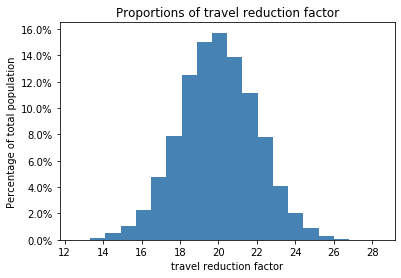

In [10]:
travel_restrictions_trigger = ReductionEventTrigger(
                                                start_percentages=[0.1],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(mean=20, std=2)
                                        )

plot_distribution(travel_restrictions_trigger.reduction_factor_distribution, 'travel reduction factor')

## Reduced Trips to Public Places

Public places have a higher risk of interacting with people. (by being in close proximity or by touching the same things etc...) Reducing trips to these public places, can slow down the growth of the virus.

In this case, the trigger enables when 15% of the total population is sick and is removed when there is only 5% of the population left that is sick.
When the policy is active, people will reduce their trips to public places on average by a factor of 4 and a standard deviation of 0.5

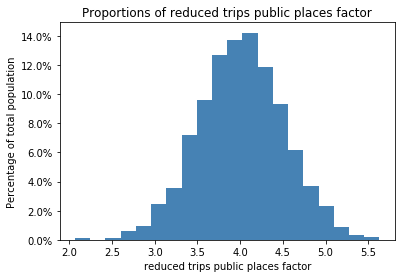

In [11]:
reduced_public_place_trips_trigger = ReductionEventTrigger(
                                                start_percentages=[0.15],
                                                end_percentages=[0.05],
                                                reduction_factor_distribution=dist.gaussian(mean=4, std=0.5)
                                        )

plot_distribution(reduced_public_place_trips_trigger.reduction_factor_distribution, 'reduced trips public places factor')

## Testing and Quarantining

Testing is a very important aspect of slowing down a pandemic. On top of getting accurate data on the situation, people that test positive and be properly quarantined in order to prevent them fon infecting anyone else.

The ````TestingTrigger```` has the same ````start_percentages```` and ````end_percentages```` as the ````ReductionTrigger````. However, it has two different distributions.

The next argument is the average time after showing symptoms that people get tested and start going into quarantine. In our case, we have that on average people get tested two days after showing symptoms with a standard deviation of 0.3 days.
However, no tests are perfect and can fail (or people can not respect quarantine), so there is another distribution for the probability of tests failing when they occur.
In out case, we have that 10% of cases with a standard deviation of 1% fail.

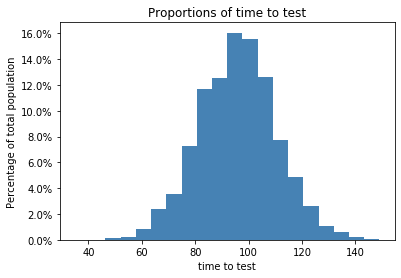

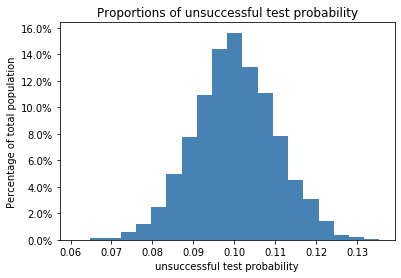

In [12]:
testing_trigger = TestingTrigger(
                                start_percentages=[0.02],
                                end_percentages=[],
                                time_to_test_distribution=dist.gaussian_time_in_days(mean_days=2, std_days=0.3, ticks_per_day=ticks_per_day),
                                unsuccessful_test_prob_distribution=dist.gaussian(mean=0.1, std=0.01)
                        )

plot_distribution(testing_trigger.time_to_test_distribution, 'time to test')
plot_distribution(testing_trigger.unsuccessful_test_prob_distribution, 'unsuccessful test probability')

Now that we have seen what all these parameters mean, we can run a basic simulation.

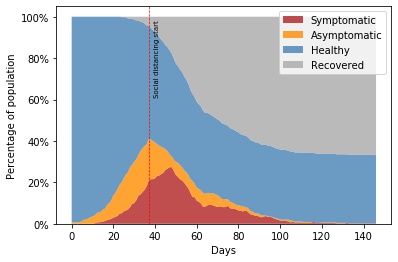

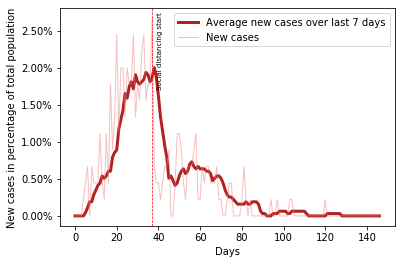

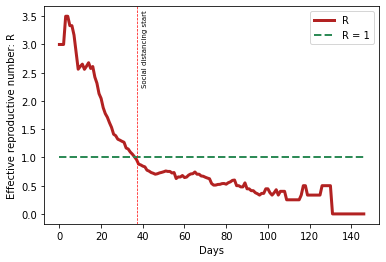

(33.11%) The percentage of people that did not get infected
(66.89%) The percentage of people that did get infected
Day 47: (27.33%) The peak percentage of total sick people (Quarantine included)
Day 37: (40.89%) The peak percentage of total infectious people (Quarantine not included)
Day 38: (2.00%) The peak percentage of total population as average daily new cases


In [14]:
from src.simulation import Simulation
from src.visualization import plot_simulation_results
from src.resuts import print_result_summary

config = Config(ticks_per_day=ticks_per_day,
                number_of_communities=3,
                people_per_community=150,
                transmit_prob_distribution=dist.gaussian_prob_in_days_per_event(mean_days_per_event=8, std_days_per_event=1, ticks_per_day=ticks_per_day),
                travel_prob_distribution=dist.multi_dist(
                                                gaussian_list=[
                                                        dist.gaussian_prob_in_days_per_event(mean_days_per_event=40, std_days_per_event=5, ticks_per_day=ticks_per_day),
                                                        dist.gaussian_prob_in_days_per_event(mean_days_per_event=365, std_days_per_event=40, ticks_per_day=ticks_per_day)
                                                    ],
                                                weights=[0.8, 0.2]
                                        ),
                recovery_time_distribution=dist.gaussian_time_in_days(mean_days=14, std_days=2, ticks_per_day=ticks_per_day),
                incubation_time_distribution=dist.gaussian_time_in_days(mean_days=11, std_days=1.5, ticks_per_day=ticks_per_day),
                public_place_prob_distribution=dist.gaussian_prob_in_days_per_event(mean_days_per_event=4, std_days_per_event=1, ticks_per_day=ticks_per_day),
                public_place_time_distribution=dist.gaussian_time_in_ticks(mean=1, std=0.2),
            
                social_distancing_trigger=ReductionEventTrigger(
                                                start_percentages=[0.2],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.multi_dist(
                                                    gaussian_list=[
                                                        dist.gaussian(mean=5, std=0.5),
                                                        dist.constant(1)
                                                    ],
                                                    weights=[0.8, 0.2]
                                                )
                                        )
                )

# Run the simulation
results = Simulation(config).start()

# Display the results
plot_simulation_results(results)
print_result_summary(results)
